## CIS 9: Final Project
## Data Analysis of San Jose Police Department Incident Reports (2018-2022) : Part 2
## Written by: Tiffany Overbo and Cherry Withers

### Project Summary
This notebook is one of two notebooks for this project. There was a necessity to divide the notebooks into two because of our 
very large dataset (~4M rows). The dataset made for very slow progress. This notebook cleans the data and will be used for our other notebook on data analysis. 

This project is to analyze incidence reports from police calls for services which are documented by the San Jose City Police Department. The goal is to analyze the trend in types of incidents, address area, time of day, frequency, and if there were any resolutions over 5 years from 2018 - 2022. This will include pre-pandemic, pandemic, and post-pandemic years to see if there is a trend and hopes to answer the following questions:
* What are the 10 top incidents being reported each year by frequency? 
* How did the pandemic affect the incident counts of the following crimes/categories: Assault, Burglary, Disturbing Peace, Drugs/Alcohol, DUI, Fraud, Motor Vehicle Theft, Robbery, Sex Crime, Larceny, Vandalism, Vehicle Breakin/Theft, Others? 
* Arrest rates for each category mentioned above (per year/per month)?  
* Where are most of these incidents occurring (street names)?
* What part of the day are the incidents taking place, ie. am, pm, after midnight?
* Which months have higher incidents of crimes being reported year after year? 
* Trend analysis of each major category from 2018-2022.  

*Note: 2023 data has only 01-01-23 thru 03-18-23 and is an incomplete year. Therefore, we will not include that in our analysis.

### Data Information
In this notebook, We will be loading 1 .csv files (post data cleaning) from 2018-2022.[Source:] (https://data.sanjoseca.gov/dataset/police-calls-for-service)

This header name and description are the following: 
1. priority: Priority of the incident
2. offense_date:Date of when the offense happened (same date as Report Date)
3. offense_time: Time of when the offense happened
4. call_type: Type of incident (186 unique types queried, possibly more)
5. final_dispo: Final Disposition
6. address: Address

__Importing Modules and Initial Look of Pre-processed Data__

In [1]:
# Import modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Read the data in and combine into one dataframe:
start = time.time()
df = pd.read_csv("FinalProject/PoliceCalls_2018_2022.csv")
end = time.time()
print("Time:", end-start)

Time: 2.8151328563690186


In [3]:
# Get the shape, the rows and columns count:
print ("Data Row count:", df.shape[0], "and Data Column count:", df.shape[1])

Data Row count: 1460576 and Data Column count: 11


### Setup: Functions:
Setting up some functions:

In [4]:
# Function 1: Get Rank and add it to the pivot table:
# Takes a Pivot Table dataframe and creates a rank, and adds it back to the Pivot Table dataframe
def get_rank(pt1):
    # Finding the count of df_arrest_mc:
    num = pt1.shape[0]
    # Creating an arrange for the rank:
    rank_num = np.arange(0,num)
    # Adding the rank number to the column Rank:
    pt1['Rank'] = rank_num
    return pt1

In [5]:
# Function 2: Get the Mean of a dataframe by a specified grouping: #grouping can be a list, i.e group by = ['type','year']
# Takes in a dataframe, group by column(s), and return a dataframe with means:
def get_mean(d1,gb1):
    # Creating the mean stats:
    d1m = d1.groupby(gb1).size().groupby(level=0).mean().rename('Mean')
    # Making the mean stats into a dataframe:
    d1m_df = pd.DataFrame(d1m )
    return d1m_df

In [6]:
# Fucntion 3: Get the Mean dataframe and add it 
# Takes a pivot table dataframe and adds the means dataframe to it
def add_mean_df(df1,dfm):
    # Adding the mean df to the major crime incidents df:
    df1= pd.concat([df1,dfm], axis=1)
    # Display the Arrest Made By Types:
    return df1

In [7]:
# Function 4: Adding all 3 functions into 1:
def get_rank_mean_pt(df1,pt1,gb1):
    # Get rank and add to Pivot Table function:
    dataframe = get_rank(pt1)
    # Get the mean function:
    df_mean = get_mean(df1,gb1)
    # Add the mean to the Pivot Table fucntion: # seperated from get mean function for more module coding:
    pt1 = add_mean_df(pt1, df_mean)
    # returns the pivot table:
    return pt1

### Data Analysis

### A: All  Police Call for Services: Top 10

We will look at the Top 10 types of incidents from 2018-2022 with the total count from year to year, and analysis the trends in the past 5 years. 

In [8]:
# A.1:
# Pivot Table for Type by Year by Count:
df_type_yr_pt = pd.pivot_table(df, values='priority', index=['type'], 
                          columns=['year'], aggfunc='count', fill_value=0, \
                          margins=True, margins_name='Total').sort_values('Total', ascending=False)
# Variable:
df1 = df
pt1 = df_type_yr_pt
gb1 = ['type','year']

# Get rank, mean, and show pivot table:
pt2 = get_rank_mean_pt(df1,pt1,gb1)
pt2.head(11).applymap('{:,.0f}'.format)

,2018,2019,2020,2021,2022,Total,Rank,Mean
type,,,,,,,,
Total,"306,087","306,176","283,305","286,393","278,615","1,460,576",0,nan
driver or traffic,"68,010","69,015","54,993","65,643","66,035","323,696",1,"64,739"
disturbance,"54,783","53,922","61,677","57,026","51,479","278,887",2,"55,777"
alarm,"25,122","27,887","21,188","20,925","22,566","117,688",3,"23,538"
welfare,"20,351","21,432","23,310","26,792","25,471","117,356",4,"23,471"
suspicious activities,"20,011","18,163","17,450","17,496","16,487","89,607",5,"17,921"
parking,"18,869","19,604","13,718","15,196","14,337","81,724",6,"16,345"
vehicle,"14,262","11,976","11,622","10,876","11,162","59,898",7,"11,980"
unknown,"8,395","8,196","7,651","7,966","7,699","39,907",8,"7,981"


__A.2: Our Observations__
<br> Although we will focuse mainly on major arrestable crime related calls, we are curious to know what occupies the majority of our law enforcements' time. The pivot table above highlights the top 10 incidents that get most of our police officer's attention. 

Driver or Traffic related calls dominated their time year by year with the exception of the year 2020 when "Disturbances" outpaced it. "Driver or Traffic" includes things like: Traffic violations, vehicle accidents, driver/vehicle license violations, etc. The year 2020 coincides with the shelter-in-place recommendations and a lot of people stayed home. The year 2020 falls below the 5-year mean. Pre-pandemic values were higher than the mean value and post pandemic levels are just slightly over the mean.

"Disturbance" came in second year to year. This includes things like: Loud Music or Noise, Fights (domestic or non-domestic), Gang related disturbances, etc. Loud Music and Domestic Family fights are two of the most called-in incidents under "Disturbance". This call type's peak outpaced "Driver or Traffic" and the highest happened on the year 2020 where it was 
way above the mean.

Third on the list is "Alarm", mainly the audible kind (there were other calls for ADT type systems). These types of calls peaked on 2019. The year 2021 was when it was at its lowest. Pre-pandemic call volumes of this time were higher than the mean
and they're lower during the pandemic and post-pandemic years. 

Calls for "Welfare" checks was gradually going higher from 2018-2020 and peaked at 2021. It reached closest to the average during the pandemic year of 2020. 

Calls related to "Suspicious Activities" were on a decline from year to year. These calls were higher than the mean during pre-pandemic yers and closer to the mean value or lower post-pandemic. 

Parking violation calls were at its lowest in 2020 (13,718) with starked difference from the year before(19,604). Again, this makes sense because most people stayed home during this year. Parking violations were higher than the mean during pre-pandemic and lower during pandemic to post-pandemic years.  

Vehicle related calls (which include: grand theft, stolen vehicle, recovered stolen vehicle, carjacking, etc.) came in 7th. It held steady from 2019-2020, from a peak of ~14K in 2018. It had a slight dip on 2021. 

Unknown consists mainly of junk calls. Trespassing and weapon related calls were their highest on 2021, coming in as 9th and 10, respectively. Both Trespassing and Weapon realated calls were lower than average during pre-pandemic and were generally higher post-pandemic. 

__Summary__

In general, these top 10 incidents were higher than their 5-year mean during pre-pandemic years and the lower than their mean post-pandemic. Most of them are at their lowest incident counts during the height of the pandemic in 2020. 

There were two exceptions, "Tresspassing" and "Weapon" related incident calls which are both lower than their means during pre-pandemic years and higher than their means during post-pandemic years. 

### B: Major Crime Incident

As part of our data analysis, we will look at the trends in the major crime incidents from 2018-2022, how major crime incidents varied from year to year, month to month, and when are most incidents reported during the day. We are also curious to see how the major crime incident numbers were affected by the pandemic shutdowns. Lastly, we will look at the arrest trends in the past 5 years. 

__B.1: Trend Analysis of Major Crime Incidents from 2018-2022__

We will investigate the trend of these following major crime incidents: Assault, Burglary, Disturbing Peace, Drugs/Alcohol, DUI , Fraud, Motor Vehicle Theft, Robbery, Sex Crime, Theft, Vehicle Breakin/Theft.

We will try to answer how the pandemic affected the incident counts of the above crimes, what is the direction of the trend

__Background:__ 
  The federal government announced a national shutdown on March 15, 2020 and was not officially lifted till May of 2023. Santa Clara schools transitioned to virtual only instruction to in-person instruction starting on June 30, 2021. The county (where San Jose is located) did not lift its mask mandate till March 2, 2022. The end mask mandate was viewed as the official end to the pandemic restrictions in the South Bay.

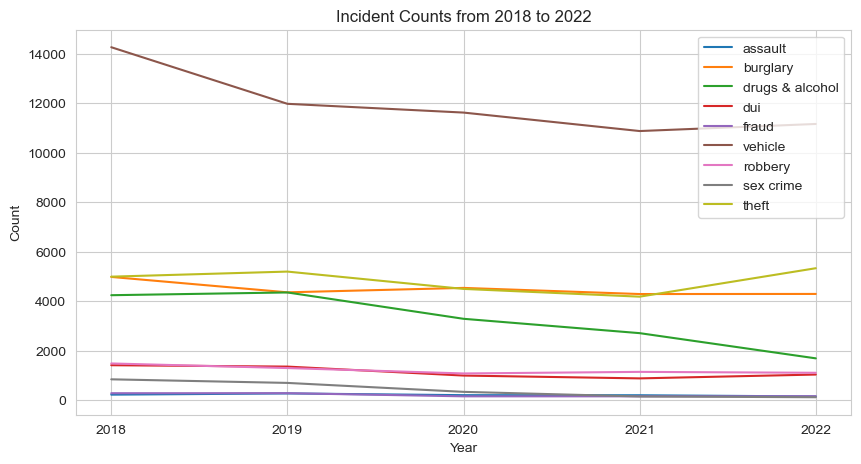

In [9]:
# B.2:
sns.set_style('whitegrid')
df_1 = df[['year', 'type']].copy()

# Modify the 'year' column using .loc
df_1.loc[:, 'year'] = df_1.loc[:, 'year'].astype(str)

major_incidents = ['assault','burglary','drugs & alcohol','dui','fraud','vehicle','robbery','sex crime','theft'] #Add the incident type 

df_count = df_1.groupby(['year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))

for incident_type in major_incidents:
    df_type = df_count[df_count['type'] == incident_type]
    plt.plot(df_type['year'], df_type['count'], label=incident_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Incident Counts from 2018 to 2022')

# show the plot
plt.legend(loc='best')
plt.show()

In [10]:
# B.3:
# Create a dataframe for just major crime incidents to analyze Arrest rates:
# A list of major crime incidents:
major_incidents = ['assault', 'burglary', 'drugs & alcohol', 'dui', 'fraud', 'vehicle', 'robbery', 'sex crime', 'theft']
# Create a new dataframe if it's in the list of major crime incidents:
df_major_crimes = df[df['type'].isin(major_incidents)]
# print(len(df_major_crimes))
# df_major_crimes.groupby('type').final_dispo.count()

In [11]:
# B.4:
# Pivot Table for:
# Creating the Pivot Table for the Final Dispo for Arrest Made By Year:
df_major_crimes_pt = pd.pivot_table(df_major_crimes, values='priority', index=['type'],
                              columns=['year'], aggfunc='count', margins=True, 
                              margins_name='Total').sort_values('Total', ascending=False)
# Variable:
df1 = df_major_crimes
pt1 = df_major_crimes_pt
gb1 = ['type','year']

# Get rank, mean, and show pivot table:
pt2 = get_rank_mean_pt(df1,pt1,gb1)
pt2.applymap('{:,.0f}'.format)

,2018,2019,2020,2021,2022,Total,Rank,Mean
type,,,,,,,,
Total,"32,750","29,821","26,744","24,617","25,082","139,014",0,nan
vehicle,"14,262","11,976","11,622","10,876","11,162","59,898",1,"11,980"
theft,"4,994","5,199","4,499","4,186","5,335","24,213",2,"4,843"
burglary,"4,983","4,361","4,540","4,292","4,296","22,472",3,"4,494"
drugs & alcohol,"4,245","4,356","3,292","2,712","1,694","16,299",4,"3,260"
robbery,"1,488","1,302","1,084","1,148","1,111","6,133",5,"1,227"
dui,"1,417","1,361",999,885,"1,040","5,702",6,"1,140"
sex crime,847,702,341,154,124,"2,168",7,434
assault,228,277,207,204,155,"1,071",8,214


__B.5: Our Observations__
<br>There's a gradual discrease of some crimes (vehicle related, theft, drugs&alcohol, & sex crimes) from 2020-2021. 

Vehicular related incidents top our incident calls from year to year. This includes every thing from every type of Vehicle related accidents, carjacking, vehicular damage (to property), vehicular related burglary, etc. The calls have been on a downward trend from 2018 with a slight uptick from 2021 to 2022. It is slightly lower than its 5-year mean during the height of the pandemic year 2020, and have been gradually going down since. 

Drugs and Alcohol related calls are on a downward trend since 2019. This includes calls about possession of drugs or narcotics or controlled substances. It was higher than its 5-year mean pre-pandemic. This downward trend can't be attributed to the pandemic shutdowns itself. 

Theft saw a downward trend from 2019-2021 and it's on an upward trend since. This could be attributed to things opening up and children and workers begin transitioning from virtual to in-person meetings. 

Robbery and Burglary related calls have remained about the same from year to year. related calls. Robbery achieved its lowest numbers in the year 2020. Robbery related calls were higher than their 5-year mean pre-pandemic and are lower post-pandemic.

Assault and Fraud were higher than their 5-year means during pre-pandemic years and have been gradually going down post-pandemic.

Sex crime related calls saw the biggest drops from its highest of 847 in 2018 & 702 in 2019 to 315 (below its 5-year mean of 433) and have dropped values by half during post-pandemic years. 

__Summary__

In general, most of these major crimes had been higher than their 5-year mean during the pre-pandemic years of 2018-2019 and generally lower post-pandemic with the exception of "Theft" which saw an uptick post-pandemic. The most dramatic drops come from Sex crime related calls which had a peak of 847 in 2018 to 124 in 2022. 

__C: Portion of Day Analysis__
<br>We would like to find out what hour of the day do most calls from our major crime incidents categories come in for (early mornings: midnight-6am, mornings: 6am-noon,afternoon: noon-6pm, evening: 6pm-midnight).

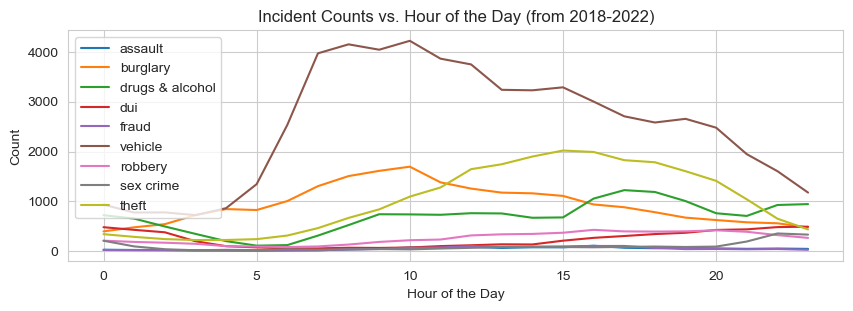

In [12]:
# C.1: Incident Counts vs. Hour of Day (from 2018-2022):
df['offense_time'] = pd.to_datetime(df['offense_time'])
df['hour'] = df['offense_time'].dt.hour

df_2 = df[['hour', 'type']].copy()

df_count = df_2.groupby(['hour', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10, 3))

for incident_type in major_incidents:
    df_type = df_count[df_count['type'] == incident_type]
    plt.plot(df_type['hour'], df_type['count'], label=incident_type)

plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Incident Counts vs. Hour of the Day (from 2018-2022)')

# show the plot
plt.legend()
plt.show()

__C.2: Our Observations__
<br> Crimes seem to take a break from early morning hours of midnight-5am and from 8pm-midnight. Incident calls on the 9 major crimes are at their lowest or on a steep downward trend during these hours.  There's one exception and that is burglary related calls, which are on an upward trend starting from midnight and peaks around 10 am in the morning and does a steady decline till midnight. On the hours of 8pm-midnight there are three exceptions to the downward trend. Drug & Alcohol, Sex Crime, and DUI calls are on an uptick with DUI's upward trend staring around 2pm in the afternoon. 

Vehicle related calls start ramping up around the hours of 4am and peak at 10 am (this is generally around the time when people start waking up and are going to work). 

Theft related calls start ramping up from 5am in the morning and peaks at around 3pm. 

Sex Crime related calls are steady during the day but ramps up from 8pm-midnight. 

Robbery related calls are on a gradual uptick till around 8pm at night when it starts to slow down. 

__D: Trend Analysis: Month vs Major Crime Incidents (Per Year 2018-2022)__
<br> Whilst Part A looks at the general trend per year of these major crime incidents, in this section we will try to zero it to see if there's a pattern per year. The question that we would like to answer is if there's a certain month where most of these crimes are being committed. 

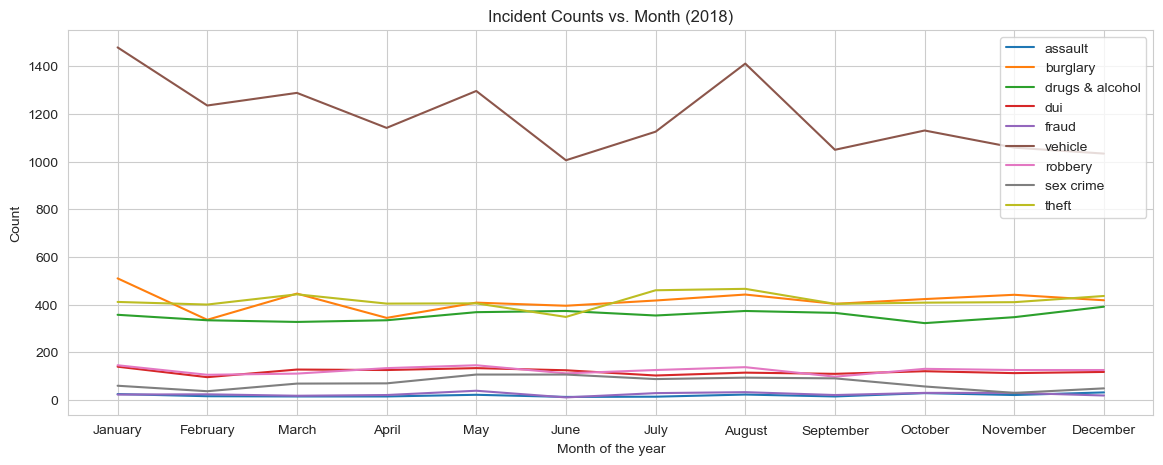

In [13]:
# D.1: Incident Counts vs. Months (2018):
import calendar

# Suppress warnings (may have to rerun this cell)
pd.options.mode.chained_assignment = None

df_3 = df[['month', 'type', 'year']].copy()

df_count = df_3.groupby(['year', 'month', 'type']).size().reset_index(name='count')

major_incidents = ['assault', 'burglary', 'drugs & alcohol', 'dui', 'fraud', 'vehicle', 'robbery', 'sex crime', 'theft']

plt.figure(figsize=(14, 5))

for incident_type in major_incidents:
    df_type = df_count[(df_count['type'] == incident_type) & (df_count['year'] == 2018)]
    if not df_type.empty:
        df_type['month'] = df_type['month'].apply(lambda x: calendar.month_name[x])
        plt.plot(df_type['month'], df_type['count'], label=incident_type)       
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title(f'Incident Counts vs. Month (2018)')
plt.legend()
plt.show()



__D.2: Our Observations__
<br> We included the year 2018 in our dataset so we can see what a pre-pandemic year looked like in terms of incident calls for these 9 major crimes. Here we see that vehicle related calls is still comprises the majority of calls coming in. January was the highest year for this crime with its lowest year in June. 
The highest number of calls on burglary also happens in this month. Theft calls peak around July and August. 
Much of the other major crime incident calls remain somewhat steady during the year. 

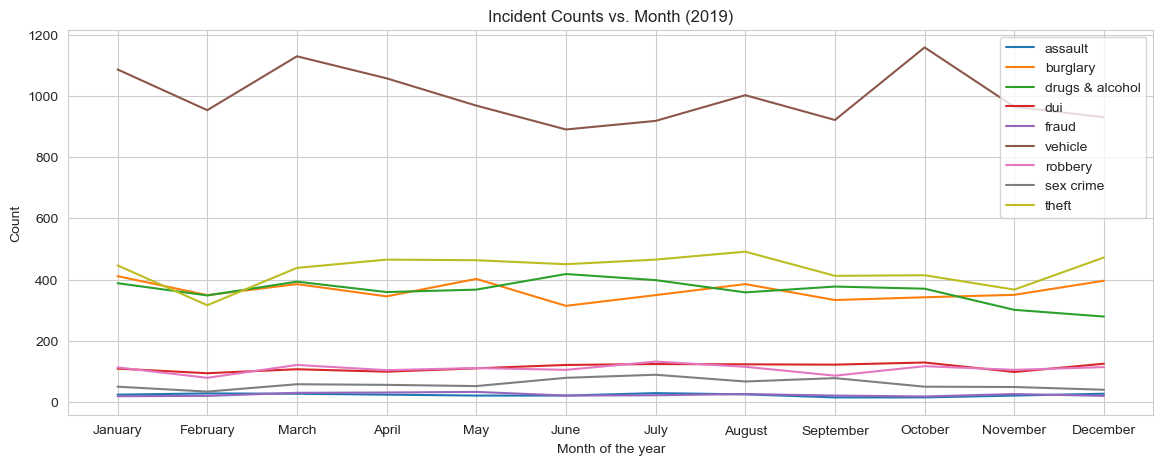

In [14]:
# D.3: Incident Counts vs. Months (2019):
plt.figure(figsize=(14, 5))

for incident_type in major_incidents:
    df_type = df_count[(df_count['type'] == incident_type) & (df_count['year'] == 2019)]
    if not df_type.empty:
        df_type['month'] = df_type['month'].apply(lambda x: calendar.month_name[x])
        plt.plot(df_type['month'], df_type['count'], label=incident_type)       
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title(f'Incident Counts vs. Month (2019)')
plt.legend()
plt.show()

__D.4: Our Observations__
<br> 2019, Another pre-pandemic year. As with the 2018 year, the months between Jan-Feb shows a slight downward trend on a few of our crime call incidents: Vehicle, Theft, Drugs & Alchol, Robbery. But these same ones are in an upward trend from Feb-March. Vehicle related calls shows a local maxima happening in march and a peak in October. 
Theft, Burglary, and DUI related calls are all on an upward trend from November to December.  

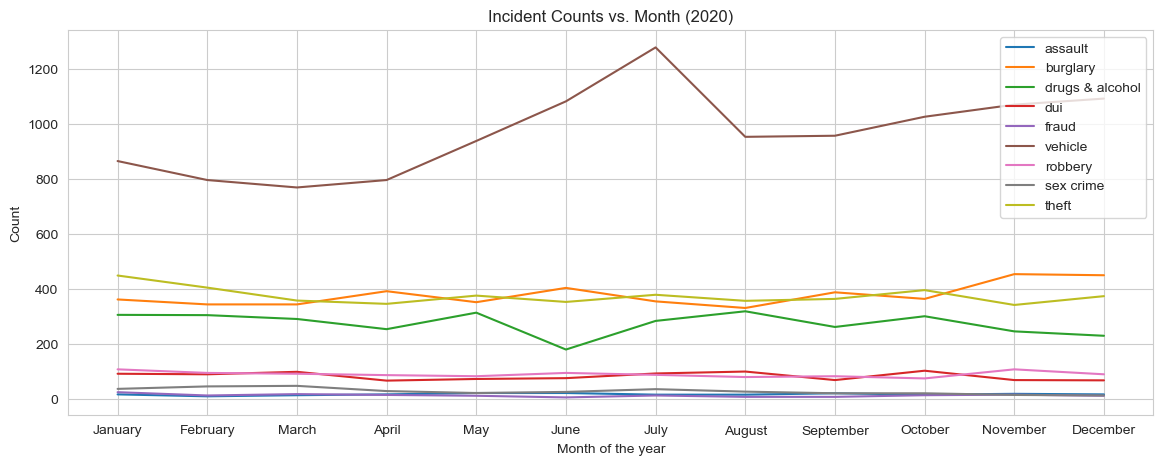

In [15]:
# D.5: Incident Counts vs. Month 2020:
plt.figure(figsize=(14, 5))

for incident_type in major_incidents:
    df_type = df_count[(df_count['type'] == incident_type) & (df_count['year'] == 2020)]
    if not df_type.empty:
        df_type['month'] = df_type['month'].apply(lambda x: calendar.month_name[x])
        plt.plot(df_type['month'], df_type['count'], label=incident_type)       
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title(f'Incident Counts vs. Month (2020)')
plt.legend()
plt.show()

__D.6: Our Observations__
<br> March 15, 2020 was the beginning of the nationwide shutdown. For the better part of this year, most people stayed home. Students were asked to learned virtually as did most of the tech workers in the area. 

In general, our data doesn't show a dramatic change in the number of call counts for the 9 major crimes. Theft, Robbery, and DUI calls were in a slight decline, but burglary was in a slight uptick from March-April. Vehicle related incident calls started its climb in April of 2020 and peaked in July. In general nothing notable can be said about this year based on the graph. As in the two years prior, theft and burglary related calls are on a slight decline during the months of Jan-Feb.

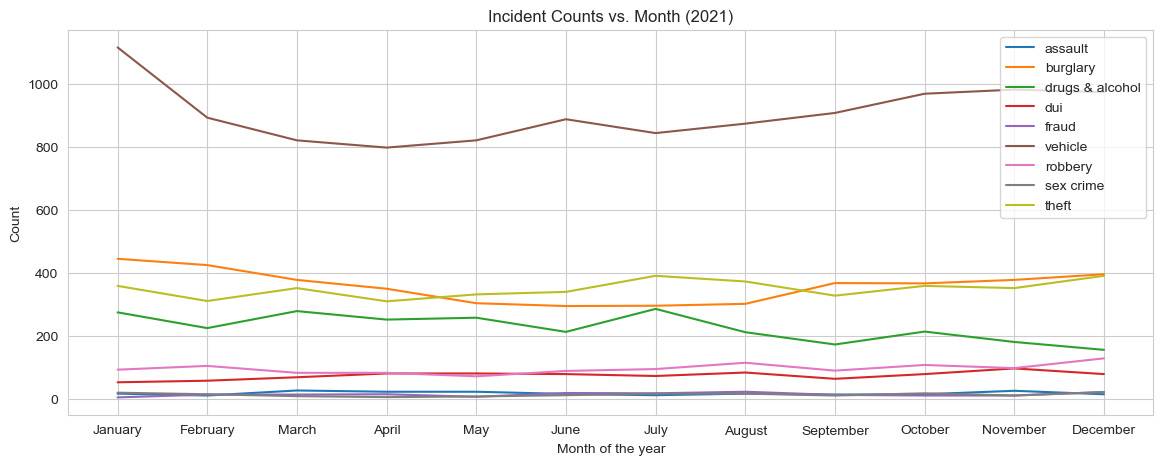

In [16]:
# D.7: Incident Counts vs. Month 2021:
plt.figure(figsize=(14, 5))

for incident_type in major_incidents:
    df_type = df_count[(df_count['type'] == incident_type) & (df_count['year'] == 2021)]
    if not df_type.empty:
        df_type['month'] = df_type['month'].apply(lambda x: calendar.month_name[x])
        plt.plot(df_type['month'], df_type['count'], label=incident_type)       
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title(f'Incident Counts vs. Month (2021)')
plt.legend()
plt.show()

__D.8: Our Observations__
<br> Students are still learning virtually and most tech company workers in the area are still asked to work remotely. It wasn't until June 30, 2021 that the Santa Clara County public director announced that students can go back to in-person learning for the coming Fall. Things were starting to open up in the latter part of this year.

The graph above shows a general decline in burglary, and vehicle related calls from January till May. Burglary related calls didn't start picking up till around August. As with the prior years, the months of Jan-Feb shows a slight decline in some major crimes like theft, burglary, and vehicle related calls with the exception of robbery that has a very small uptick. 

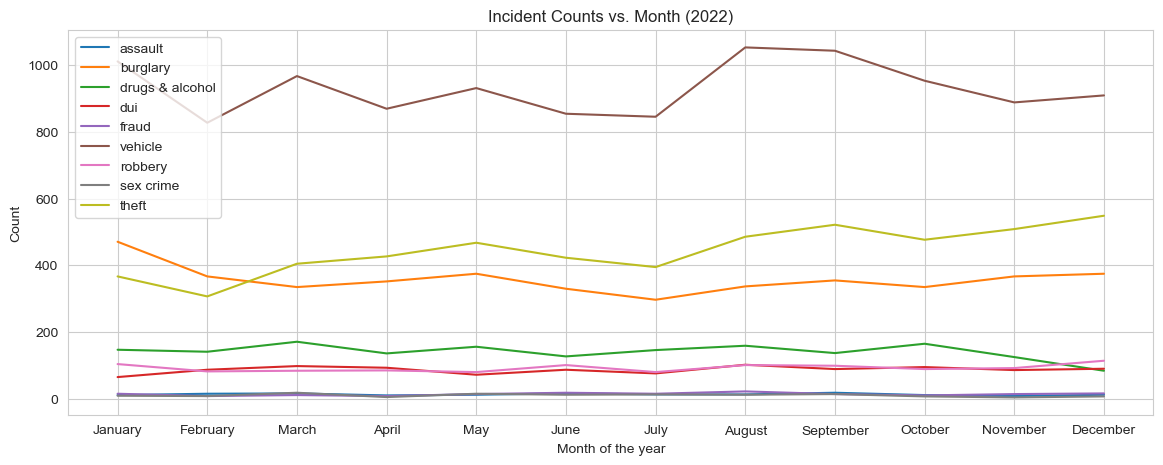

In [17]:
# D.9: Incident Counts vs. Month 2022:
plt.figure(figsize=(14, 5))

for incident_type in major_incidents:
    df_type = df_count[(df_count['type'] == incident_type) & (df_count['year'] == 2022)]
    if not df_type.empty:
        df_type['month'] = df_type['month'].apply(lambda x: calendar.month_name[x])
        plt.plot(df_type['month'], df_type['count'], label=incident_type)       
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title(f'Incident Counts vs. Month (2022)')
plt.legend()
plt.show()

__D.10: Our Observations__
<br> March 2, 2022 was when the Santa Clara County Board of Health lifted the mask mandate and this was the official end to most restrictions in the area. 

Theft related calls started its general gradual climb starting in February. Burglary started it gradual uphill trend around March as well. As with prior years, Jan-Feb sees a decline in some of our major crime calls: theft, burglary, robbery, and vehicle related calls. 

__D.11: Summary of Month-to-Month Observations__
<br> There has been two notable patterns that emerged year after year. From Jan-February, major crime related calls were on a downward trend before beginning their upward trend after the month of February. The months of November and December shows an uptick in some of the major crimes leading up to the holiday season. 

__E. Arrest and Other Final Disposition Analysis__
<br> For each call, a "disposition" status is logged. This indicates the actions taken by the assigned or responding individual. 
<br>Based on final disposition (final_dispo column), we'd like to know how many arrests are made per year especially those deemed "major crimes" (ie, burglary, robbery, etc. ). For this analysis, we will depend highly on Pandas Pivot Tables as it will show the numbers quickly. "Arrests" includes rows with Final Disposition values of "Arrest Made" and "Arrest Made by Warrant" 

In [18]:
# E.1: Final Dispo by Year by Count:
# Pivot Table for Final Dispo by Year by Count:
# First, adding Arrest Made and Arrest into a copied dataframe.
# Changing Arrest Make the same name as Arrest:
df['final_dispo'] = df['final_dispo'].replace('Arrest by Warrant', 'Arrest Made')
# Creating the Pivot Table for the Final Dispo for Arrest Made By Year:

df_final_dispo_yr_pt = pd.pivot_table(df, values='priority', index=['final_dispo'], 
                          columns=['year'], aggfunc='count', fill_value=0, \
                          margins=True, margins_name='Total').sort_values('Total', ascending=False)
# Variable:
df1 = df
pt1 = df_final_dispo_yr_pt
gb1 = ['final_dispo','year']

# Get rank, mean, and show pivot table:
pt2 = get_rank_mean_pt(df1,pt1,gb1)
pt2.head(11).applymap('{:,.0f}'.format)

,2018,2019,2020,2021,2022,Total,Rank,Mean
final_dispo,,,,,,,,
Total,"306,087","306,176","283,305","286,393","278,615","1,460,576",0,nan
No report required; dispatch record only,"135,019","140,919","139,004","84,889","132,468","632,299",1,"126,460"
Canceled,"39,553","43,923","43,482","50,330","49,018","226,306",2,"45,261"
Report taken,"39,234","36,316","31,797","31,692","32,532","171,571",3,"34,314"
Gone on Arrival/unable to locate,"20,468","19,392","17,981","9,968","14,207","82,016",4,"16,403"
No report required; dispatch r,0,0,0,"49,830",0,"49,830",5,"49,830"
No Disposition,"9,245","9,668","9,579","9,705","9,853","48,050",6,"9,610"
"Traffic Citation Issued, Non-Hazardous Violation","12,077","13,650","6,753","3,182","6,019","41,681",7,"8,336"
"Traffic Citation Issued, Hazardous Violation","8,069","9,192","4,743","8,408","8,892","39,304",8,"7,861"


In [19]:
# E.2: Final Dispo by Percentage to Total: 
# Pivot Table on the Percentage to Total:
# Need a variable total for percentage to total calculation:
total_count = df['type'].count()
#total_count

# Pivot Table for final_dispo by year by percentage:
df_final_dispo_yr_pt_pc = pd.pivot_table(df, values='priority', index=['final_dispo'], columns=['year'],\
                             aggfunc=[(lambda x: sum(x)/total_count)] , fill_value=0)
df_final_dispo_yr_pt_pc.head(5).applymap('{:,.2%}'.format)

<lambda>                        \
year                                          2018   2019   2020    2021   
final_dispo                                                                
Arrest Made                                  2.19%  2.28%  1.51%   1.30%   
Canceled                                     7.71%  8.74%  8.98%  10.41%   
Courtesy Service/Citizen or ag               0.00%  0.00%  0.00%   0.27%   
Courtesy Service/Citizen or agency assist    0.88%  0.78%  0.91%   0.41%   
Criminal Citation                            1.11%  1.21%  0.92%   0.75%   

                                                   
year                                         2022  
final_dispo                                        
Arrest Made                                 1.33%  
Canceled                                   10.10%  
Courtesy Service/Citizen or ag              0.00%  
Courtesy Service/Citizen or agency assist   0.59%  
Criminal Citation                           0.66%

In [20]:
# E.3: Final Dispo for Arrest Made By Year:
# Pivot Table for Final Dispo for Arrest Made By Year:
# Adding Arrest Made and Arrest into a copied dataframe.
df_arrest = df[(df.final_dispo == 'Arrest Made') | (df.final_dispo == 'Arrest by Warrant')].copy()
# Changing Arrest Make the same name as Arrest:
df_arrest['final_dispo'] = df_arrest['final_dispo'].replace('Arrest by Warrant', 'Arrest Made')
# Creating the Pivot Table for the Final Dispo for Arrest Made By Year:
df_arrest = df_arrest[df_arrest['final_dispo'] == 'Arrest Made'].pivot_table(values=['priority']
                                                                             , index=['final_dispo']
                                                                             , columns=['year']
                                                                             , aggfunc='count'
                                                                             , margins=True
                                                                             , margins_name='Total')
df_arrest.iloc[:-1].applymap('{:,.0f}'.format)

priority                                    
year            2018   2019   2020   2021   2022   Total
final_dispo                                             
Arrest Made    9,446  9,900  7,008  6,355  6,270  38,979

__E.4: Our Observations__
<br> Over the 5 years, the total Arrest Made ranked number 9th highest final disposition at 39K out of 1.4M, which is about 2.7% of all total final dispositions with a mean of 7.8k for 5 years. <br>
<br>Arrest Made is approximately greater than the mean on average of 1.5K more in pre pandemic years. This is more than 2% before total deposition in 2018 and 2019. There were 9.4K and 9.9k per those years, a slight increase from 2018 to 2019 by 500. These are out of the total incidents of 306K per those years. During the pandemic, in 2020 it drastically decreased to 7k which is below the mean by 700. During shelter in place in 2020, there were 1.9k less than previous year in 2019. Year over year, Arrest Made continues to drop to 6.3K in 2021 and then 2022 to 6.2K, well below the mean.  The downward trend is in line with the overall total incidents where pandemics and post pandemics show a decline in 2020 to 283K, 2021 to 286K, and 278K, compared to pre-pandemic 2018 and 2019 at 306K, which is about 23K less. In summary, shelter in place restrictions most likely contributed to the overall amount of incidents and thus less major crimes for arrest to be made. <br>

__E.5. Arrest Rates For Major Crime Incidents Types by Year__
<br> Within all the Arrest Make, we want to review the arrest rate for each category listed in the major crime incidents.

In [21]:
# E.6: Arrest Rates for major crime incidents:

# Pivot Table for Final Dispo for Arrest Made By Year:
# Adding Arrest Made and Arrest into a copied dataframe.
df_arrest_mc = df_major_crimes[(df_major_crimes.final_dispo == 'Arrest Made') | (df_major_crimes.final_dispo == 'Arrest by Warrant')].copy()
# Changing Arrest Make the same name as Arrest:
df_arrest_mc['final_dispo'] = df_arrest_mc['final_dispo'].replace('Arrest by Warrant', 'Arrest Made')
# Creating the Pivot Table for the Final Dispo for Arrest Made By Year:
df_arrest_mc_pt = pd.pivot_table(df_arrest_mc, values='priority', index=['type'],
                              columns=['year'], aggfunc='count', margins=True, 
                              margins_name='Total').sort_values('Total', ascending=False)
# Variable:
df1 = df_arrest_mc
pt1 = df_arrest_mc_pt
gb1 = ['type','year']

# Get rank, mean, and show pivot table:
pt2 = get_rank_mean_pt(df1,pt1,gb1)
pt2.head(11).applymap('{:,.0f}'.format)

,2018,2019,2020,2021,2022,Total,Rank,Mean
type,,,,,,,,
Total,"2,473","2,594","1,842","1,371","1,384","9,664",0,nan
drugs & alcohol,"1,339","1,339",875,573,378,"4,504",1,901
dui,528,599,435,417,567,"2,546",2,509
burglary,95,130,125,125,108,583,3,117
theft,145,170,88,61,116,580,4,116
robbery,105,108,110,95,89,507,5,101
vehicle,86,84,101,73,70,414,6,83
sex crime,128,110,71,16,38,363,7,73
fraud,38,42,20,7,13,120,8,24


In [22]:
# E.7:
# Pivot Table on the percentage to total:
# Need a variable total for percentage to total calculation:
total_count_amc = df_arrest_mc['type'].count()
#total_count

# Pivot Table for final_dispo by year by percentage:
df_arrest_mc_pt_pc = pd.pivot_table(df_arrest_mc, values='priority', index=['final_dispo','type'],
                              columns=['year'], aggfunc=[(lambda x: sum(x)/total_count_amc)], fill_value=0)
df_arrest_mc_pt_pc.applymap('{:,.2%}'.format)

<lambda>                                
year                            2018    2019    2020    2021    2022
final_dispo type                                                    
Arrest Made assault            0.18%   0.33%   0.41%   0.08%   0.14%
            burglary           1.48%   1.96%   1.81%   1.69%   1.68%
            drugs & alcohol   55.67%  56.25%  36.21%  24.14%  16.07%
            dui               14.04%  16.54%  11.63%  10.62%  14.49%
            fraud              1.11%   1.38%   0.57%   0.21%   0.42%
            robbery            1.73%   1.70%   1.61%   1.48%   1.47%
            sex crime          4.51%   4.19%   2.52%   0.56%   1.20%
            theft              4.62%   5.61%   2.77%   2.09%   3.86%
            vehicle            2.59%   2.48%   2.78%   1.73%   2.04%

Text(0, 0.5, 'count')

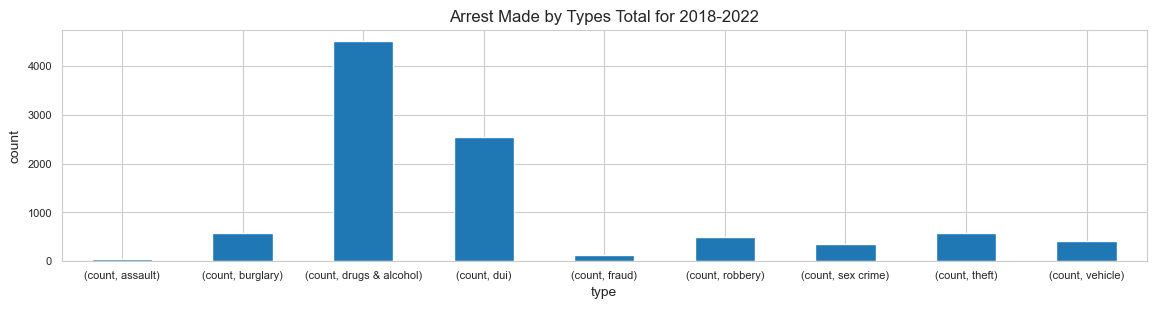

In [23]:
# E.8:
# Bar chart of total Arrest Made per each major crime incidents types form 2018-2022:
pl2 = df_arrest_mc.groupby('type').year.agg(['count']).unstack().plot.bar(rot=0, figsize=(14,3), fontsize=8)
pl2.plot(kind='bar')
plt.title('Arrest Made by Types Total for 2018-2022')
plt.xlabel('type')
plt.ylabel('count')

__E.9: Our Observations__
<br> For all the major crime incident types that arrest was made from 2018-2022, drugs & alcohol is the number one with 4.5k arrests made which is 16% out of 9.6K total arrests made. Following second is DUI with 2.5 arrests made which is 14.5% of the total arrest made. As indicated in the bar chart above, for all arrests made, drugs & alcohol surpass all types with DUI being the 2nd highest, almost half of drugs & alcohol arrests. Both of these make up 30% of the arrests made for these major crime incidents. <br>
<br> For Year over year, the breakdown still shows drugs & alcohol as the number one highest arrest made every year with a mean of 900. There were 1.3K arrests or 55.7% in 2018 and the same amount in 2019 with 56.3% of total, which is 400 more arrests above the mean. During the pandemic, there were 875 arrests or 36.2% in 2020, 573 arrests or 24.14% in 2021, and 378 arrests or 16.1% in 2022. These are well below the mean. Prepandemic arrest was high with a significant drop of about 1/3 less arrest during pandemic,  and continued to decline post pandemic. 

However, arrests for DUI were at its highest in 2019 at 599 arrests and then dropped about 1/3 less in the first 2 years of the pandemic, but increased back up in 2022 to 567 arrests, which is above the mean of 509. 

Interestingly, although burglary is only 1.5% of the total arrest at about 583 arrests for all 5 years, with a mean of 117, burglary in each year increased significantly in 2019 from 95 arrests in 2018 to 130 arrests in 2019. Burglary was at its lowest in 2018 at 95 arrests below the mean by 20 arrests less. However, during the pandemic, burglary arrests increased and held at 125 arrests in 2020 and 2021 with a slight decrease in 2022. This can be interpreted as more burglary occurred during pandemic or less overall incident occurred and police force was able to focus on serious crime like burglary to arrest.

At a lower arrest rate, both robbery and vehicle both increase during pandemic. For robbery, increase to 110 in 2020 from 108 in 2019. And for vehicles, arrests increase to 101 in 2022 from 84 in 2019. Again, this drop was only in 2019. Potentially, this was due to police being able to focus on these arrests.


### Conclusion:

Our summary analysis and summary conclusions are in each section. 

There are a couple of reasons that our dataset could have skewed our results. 
1. First, we assumed that the EID was the unique identifier. The CDTS could also have been the unique identifier. However, in our quick glance of sample data, there were multiple CDTS for one EID. After reviewing, we assume there is a possibility that there are multiple CDTS created for the same EID and therefore we decide to use EID as the unique identifier.
2. Second, we assumed that the last Start Date of the entry is the final disposition for that EID. It is possible the arrest could have been made at an earlier Start Date and then another note documented as another final disposition.
3. Another potential error that could happen is that we may have grouped CALL_TYPE incorrectly into a type. However, we spent most of our hours cleaning, verifying, and reviewing the groups to best fit its type.


There is room to enhance our analysis if we had more time. One enhancement was to analyze where most of these incidents are occuring, and to see if there are patterns. We did preliminary research on the ability to do geo mapping. Our dataset did not have specific addresses, zip codes, nor any longitude and latitude coordinates which longitude and latitude coordinates are required for geo mapping. After extensive research, we were able to find a free website nominatim.openstreetmap.org that has information with longitude and latitude so we were able to do some API requests. However since the addresses were in a range and had no zip code, Nominatim returned multiple possible results. For instance, an address "[0]-[100] ALEXANDER AV, San Jose, CA" had 3 positive results in Nominatim. So in our API request with our sample dataset of 30 addresses, it returned 52 results. Afterward, we tried to get longitude and latitude for one month of data (Jan 2023), which has 16k lines. This took between 3.5-4 hours to finish and returned 68k of lines. Unfortunately, due to lack of time, we decided not to invest anymore time into troubleshooting how to resolve the multiple potential addresses issue and to continue to invest more time in self education on geo mapping.